In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Import Data

In [2]:
data = pd.read_csv('AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100326,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095092,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088112,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090293,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092911,73449600


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10425 entries, 0 to 10424
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10425 non-null  object 
 1   Open       10425 non-null  float64
 2   High       10425 non-null  float64
 3   Low        10425 non-null  float64
 4   Close      10425 non-null  float64
 5   Adj Close  10425 non-null  float64
 6   Volume     10425 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 570.2+ KB


## To Date Time

In [4]:
data.Date = pd.to_datetime(data.Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10425 entries, 0 to 10424
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10425 non-null  datetime64[ns]
 1   Open       10425 non-null  float64       
 2   High       10425 non-null  float64       
 3   Low        10425 non-null  float64       
 4   Close      10425 non-null  float64       
 5   Adj Close  10425 non-null  float64       
 6   Volume     10425 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 570.2 KB


## Filter Date

In [5]:
data = data[data.Date >= '2012-01-01'].reset_index(drop=True)

## Format dataframe

In [6]:
data.set_index('Date', inplace=True)
data.drop(columns=['Adj Close', 'Volume'], inplace=True)
data.head()

,Open,High,Low,Close
Date,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786
2012-01-04,14.642857,14.810000,14.617143,14.765714
2012-01-05,14.819643,14.948214,14.738214,14.929643
2012-01-06,14.991786,15.098214,14.972143,15.085714
2012-01-09,15.196429,15.276786,15.048214,15.061786


In [7]:
data.describe()

,Open,High,Low,Close
count,2590.000000,2590.000000,2590.000000,2590.000000
mean,52.383125,52.941286,51.836750,52.411922
std,42.979805,43.505977,42.470230,43.015285
min,13.856071,14.271429,13.753571,13.947500
25%,23.792231,24.021161,23.577233,23.783751
50%,34.277500,34.360001,34.072501,34.239999
75%,56.430625,56.998124,55.842499,56.252500
max,182.630005,182.940002,179.119995,182.009995


# Preprocess data

In [8]:
X = data.drop(columns=['Close'])
y = data.Close

In [9]:
splitSize = 0.30
split = round(len(X) * splitSize)
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

# Fit Model

In [10]:
model = LinearRegression().fit(X_train, y_train)

# Model Metrics

In [11]:
print('Training R2 score {} %'.format(round(model.score(X_train, y_train) * 100, 2)))

Training R2 score 99.91 %


In [12]:
print('Test R2 score {} %'.format(round(model.score(X_test, y_test) * 100, 2)))

Test R2 score 99.98 %


# Plot Model Predictions

In [13]:
y_pred = model.predict(X_test)

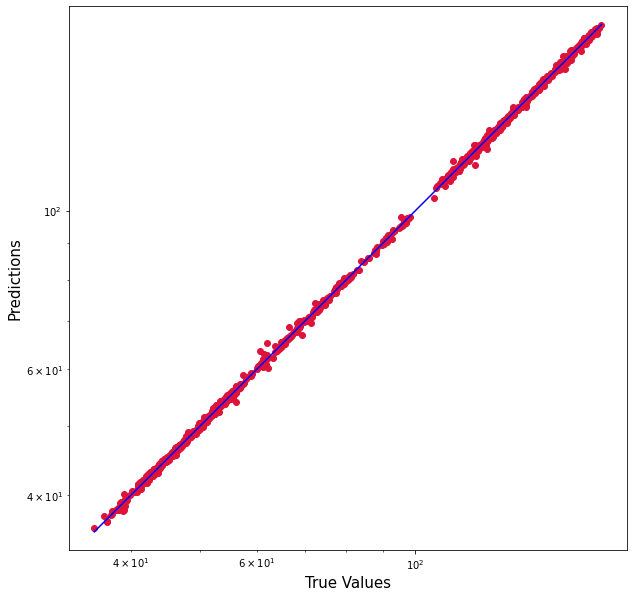

In [14]:
plotSplit = 700
plt.figure(figsize=(10,10))
plt.scatter(y_test[plotSplit:], y_pred[plotSplit:], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred[plotSplit:]), max(y_test[plotSplit:]))
p2 = min(min(y_pred[plotSplit:]), min(y_test[plotSplit:]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# More Metrics

In [15]:
#https://www.geeksforgeeks.org/solving-linear-regression-in-python/
#https://www.statology.org/sst-ssr-sse/
from sklearn.metrics import mean_squared_error, r2_score

## Error of Predictions

In [16]:
error = y_test - y_pred

In [26]:
y_test

Date
2015-02-05     29.985001
2015-02-06     29.732500
2015-02-09     29.930000
2015-02-10     30.504999
2015-02-11     31.219999
                 ...    
2022-04-11    165.750000
2022-04-12    167.660004
2022-04-13    170.399994
2022-04-14    165.289993
2022-04-18    165.070007
Name: Close, Length: 1813, dtype: float64

In [27]:
y_pred

array([ 29.89925006,  29.74403982,  29.88722275, ..., 170.02518034,
       166.79099135, 165.95619046])

In [17]:
error

Date
2015-02-05    0.085751
2015-02-06   -0.011540
2015-02-09    0.042777
2015-02-10    0.046171
2015-02-11    0.127054
                ...   
2022-04-11   -0.742479
2022-04-12   -0.882118
2022-04-13    0.374814
2022-04-14   -1.500998
2022-04-18   -0.886183
Name: Close, Length: 1813, dtype: float64

## Sum of Squares Error (SSE) – The sum of squared differences between predicted data points (ŷi) and observed data points (yi).

    SSE = Σ(ŷi – yi)2


In [18]:
sse = np.sum(error**2)
print('Squared error is', sse)

Squared error is 601.8548636090698


## Mean Squared Error (MSE)
One of the most common metrics used to measure the forecast accuracy of a model is MSE, which stands for mean squared error. It is calculated as:

MSE = (1/n) * Σ(actual – forecast)2

where:

    Σ – a fancy symbol that means “sum”
    n – sample size
    actual – the actual data value
    forecast – the forecasted data value

The lower the value for MSE, the better a model is able to forecast values accurately.

https://www.statology.org/how-to-calculate-mean-squared-error-mse-in-excel/

In [19]:
mse = sse / len(y_test)
print('Mean squared error is', mse)

Mean squared error is 0.3319662788797958


## SKLearn Mean Squared Error

In [20]:
print('Mean squared error is', mean_squared_error(y_test, y_pred))

Mean squared error is 0.3319662788797958


## Root Mean Square Error (RMSE)

How to Interpret Root Mean Square Error (RMSE)

Regression analysis is a technique we can use to understand the relationship between one or more predictor variables and a response variable. 

One way to assess how well a regression model fits a dataset is to calculate the root mean square error, which is a metric that tells us the average distance between the predicted values from the model and the actual values in the dataset.

The lower the RMSE, the better a given model is able to “fit” a dataset.

The formula to find the root mean square error, often abbreviated RMSE, is as follows:

RMSE = √Σ(Pi – Oi)2 / n

where:

    Σ is a fancy symbol that means “sum”
    Pi is the predicted value for the ith observation in the dataset
    Oi is the observed value for the ith observation in the dataset
    n is the sample size

https://www.statology.org/how-to-interpret-rmse/

In [21]:
rmse = np.sqrt(mse)
print('Root mean square error is', round(rmse, 2))

Root mean square error is 0.58


In [22]:
print('Root mean square error is', np.sqrt(mean_squared_error(y_test, y_pred)))

Root mean square error is 0.5761651489632081


## R2 Coefficient of Determination
Linear regression is used to find a line that best “fits” a dataset.

We often use three different sum of squares values to measure how well the regression line actually fits the data:

1. Sum of Squares Total (SST) – The sum of squared differences between individual data points (yi) and the mean of the response variable (y).

    SST = Σ(yi – y)2

2. Sum of Squares Regression (SSR) – The sum of squared differences between predicted data points (ŷi) and the mean of the response variable(y).

    SSR = Σ(ŷi – y)2

3. Sum of Squares Error (SSE) – The sum of squared differences between predicted data points (ŷi) and observed data points (yi).

    SSE = Σ(ŷi – yi)2

The following relationship exists between these three measures:

SST = SSR + SSE

Thus, if we know two of these measures then we can use some simple algebra to calculate the third.
SSR, SST & R-Squared

R-squared, sometimes referred to as the coefficient of determination, is a measure of how well a linear regression model fits a dataset. It represents the proportion of the variance in the response variable that can be explained by the predictor variable.

The value for R-squared can range from 0 to 1. A value of 0 indicates that the response variable cannot be explained by the predictor variable at all. A value of 1 indicates that the response variable can be perfectly explained without error by the predictor variable.

Using SSR and SST, we can calculate R-squared as:
R-squared = 1 - sum of squares error / sum of squares total

https://www.statology.org/sst-ssr-sse/

In [23]:
SSt = np.sum((y_test - np.mean(y_test))**2)
R2 = 1 - (sse / SSt)
print('R square is', R2)

R square is 0.9998347446867609


In [24]:
print('R square is', r2_score(y_test, y_pred))

R square is 0.9998347446867609


In [25]:
print('R square is', model.score(X_test, y_test))

R square is 0.9998347446867609


In [28]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [30]:
X_test.iloc[0]

Open    30.004999
High    30.057501
Low     29.812500
Name: 2015-02-05 00:00:00, dtype: float64

In [33]:
model.predict(np.array([31.25, 31.75, 30.25]).reshape(1,-1))

array([30.876126])